# Clone github repository

In [ ]:
%rm -rf 'MyLibEVA'
!git clone https://github.com/sadhana1058/MyLibEVA

Cloning into 'MyLibEVA'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 31 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [ ]:
import sys
sys.path.append('/MyLibEVA/')

!pip install git+https://github.com/albumentations-team/albumentations.git

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-7ca5auxd
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-7ca5auxd
     |████████████████████████████████| 47.6 MB 2.2 MB/s 
  Created wheel for albumentations: filename=albumentations-1.1.0-py3-none-any.whl size=103612 sha256=fd3a12f97b495bd095ad90dd2205d8284f42cbafe392d0ae3bca1c8f60fc9e79
  Stored in directory: /tmp/pip-ephem-wheel-cache-dubotsh_/wheels/09/5b/e0/38cb85186b3cb979092395de69893163f9a223a72066123599
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


# Libraries 

In [ ]:
from MyLibEVA.models import resnet
from MyLibEVA import utils
# from MyLibEVA import main
from MyLibEVA.GradCAM.visualization import VisualizeCam
from MyLibEVA.models.resnet import ResNet18
from MyLibEVA.misclassification import *
from MyLibEVA.Accuracy import *
from MyLibEVA.trainingtesting import *
from MyLibEVA.utils import *
from MyLibEVA.main import *
from MyLibEVA import Accuracy

In [ ]:
!pip install torchsummary
!pip install -U albumentations

from torchsummary import summary
device = torch.device("cuda" if use_cuda else "cpu")

In [ ]:
from torchvision.utils import make_grid
import numpy as np
%matplotlib inline
import torchvision
import torchvision.transforms as transforms
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline



# CUDA Availablity

In [ ]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


# Model Summary

In [ ]:

device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
summary(model,  input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
        GroupNorm-14          [-1,

# Train and testloaders

In [ ]:
from MyLibEVA.dataAugmentation import *
from dataAugmentation import Cifar10Dataset

train_transforms = getTrainTransforms()
test_transforms = getTestTransforms()

class args():
    def __init__(self,device = 'cpu' ,use_cuda = False) -> None:
        self.batch_size = 256
        self.device = device
        self.use_cuda = use_cuda
        self.kwargs = {'num_workers': 1, 'pin_memory': True} if self.use_cuda else {}

trainset = Cifar10Dataset(root='../data', train=True,download=True, transform=train_transforms) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=args().batch_size,shuffle=True, **args().kwargs)


testset = Cifar10Dataset(root='../data', train=False,download=True, transform=test_transforms) 
testloader = torch.utils.data.DataLoader(testset, batch_size=args().batch_size,shuffle=True, **args().kwargs)

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:694: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


# Before data augmentation

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([256, 3, 32, 32])


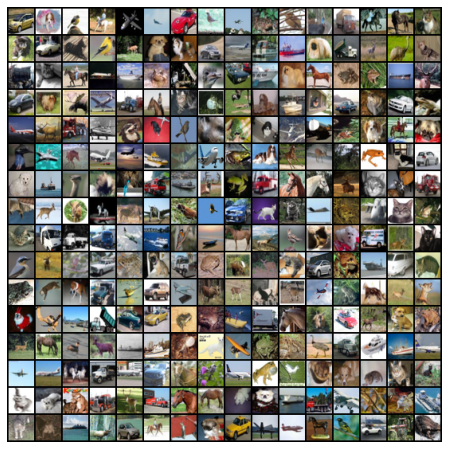

In [ ]:

trainset = Cifar10Dataset(root='../data', train=True,download=True)#, transform=train_transforms) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=args().batch_size,shuffle=True, **args().kwargs)

testset = Cifar10Dataset(root='../data', train=False,download=True)#, transform=test_transforms) 
testloader = torch.utils.data.DataLoader(testset, batch_size=args().batch_size,shuffle=True, **args().kwargs)
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

# After data augmentation

In [ ]:
trainset = Cifar10Dataset(root='../data', train=True,download=True, transform=train_transforms) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=args().batch_size,shuffle=True, **args().kwargs)


testset = Cifar10Dataset(root='../data', train=False,download=True, transform=test_transforms) 
testloader = torch.utils.data.DataLoader(testset, batch_size=args().batch_size,shuffle=True, **args().kwargs)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([256, 3, 32, 32])


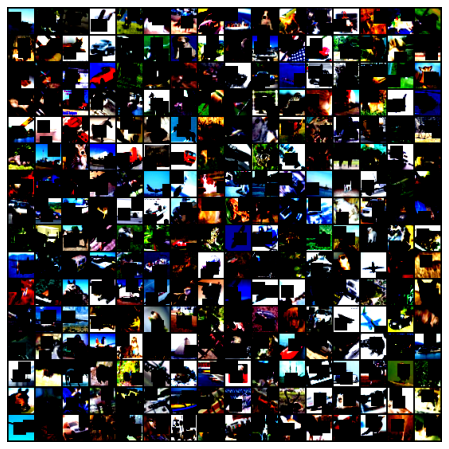

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
for images, _ in trainloader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

# Optimizer

In [ ]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Epoch


In [ ]:
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    trainNetwork(model,epoch, optimizer,criterion,trainloader)
    testNetwork(model, epoch,testloader)

Epoch 1


Loss=1.8024873733520508 Batch_id=390 Train Accuracy=37.73: 100%|██████████| 391/391 [02:16<00:00,  2.87it/s]



Test set: Average loss: 1.4976, Test Accuracy: 4671/10000 (46.71%)

Epoch 2


Loss=1.3606120347976685 Batch_id=390 Train Accuracy=49.19: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 1.1067, Test Accuracy: 6059/10000 (60.59%)

Epoch 3


Loss=1.4138081073760986 Batch_id=390 Train Accuracy=54.67: 100%|██████████| 391/391 [02:16<00:00,  2.86it/s]



Test set: Average loss: 1.0775, Test Accuracy: 6309/10000 (63.09%)

Epoch 4


Loss=1.0150809288024902 Batch_id=390 Train Accuracy=59.79: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]



Test set: Average loss: 1.0177, Test Accuracy: 6485/10000 (64.85%)

Epoch 5


Loss=0.9737280011177063 Batch_id=390 Train Accuracy=62.42: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.8015, Test Accuracy: 7160/10000 (71.60%)

Epoch 6


Loss=1.1444149017333984 Batch_id=390 Train Accuracy=64.90: 100%|██████████| 391/391 [02:18<00:00,  2.81it/s]



Test set: Average loss: 0.7334, Test Accuracy: 7509/10000 (75.09%)

Epoch 7


Loss=0.862195611000061 Batch_id=390 Train Accuracy=67.10: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.7121, Test Accuracy: 7602/10000 (76.02%)

Epoch 8


Loss=0.7897188067436218 Batch_id=390 Train Accuracy=68.69: 100%|██████████| 391/391 [02:18<00:00,  2.81it/s]



Test set: Average loss: 0.6242, Test Accuracy: 7853/10000 (78.53%)

Epoch 9


Loss=0.9160833358764648 Batch_id=390 Train Accuracy=70.09: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.6283, Test Accuracy: 7886/10000 (78.86%)

Epoch 10


Loss=0.7009462714195251 Batch_id=390 Train Accuracy=71.16: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]



Test set: Average loss: 0.5624, Test Accuracy: 8134/10000 (81.34%)

Epoch 11


Loss=0.6723220348358154 Batch_id=390 Train Accuracy=72.53: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.7402, Test Accuracy: 7622/10000 (76.22%)

Epoch 12


Loss=0.8994243741035461 Batch_id=390 Train Accuracy=73.57: 100%|██████████| 391/391 [02:18<00:00,  2.81it/s]



Test set: Average loss: 0.5478, Test Accuracy: 8195/10000 (81.95%)

Epoch 13


Loss=0.8111507296562195 Batch_id=390 Train Accuracy=74.19: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.4974, Test Accuracy: 8280/10000 (82.80%)

Epoch 14


Loss=0.8665165901184082 Batch_id=390 Train Accuracy=74.88: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]



Test set: Average loss: 0.4853, Test Accuracy: 8373/10000 (83.73%)

Epoch 15


Loss=0.6989811658859253 Batch_id=390 Train Accuracy=75.45: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.4581, Test Accuracy: 8514/10000 (85.14%)

Epoch 16


Loss=0.961521327495575 Batch_id=390 Train Accuracy=76.62: 100%|██████████| 391/391 [02:18<00:00,  2.81it/s]



Test set: Average loss: 0.4549, Test Accuracy: 8445/10000 (84.45%)

Epoch 17


Loss=0.5958508253097534 Batch_id=390 Train Accuracy=76.66: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.4676, Test Accuracy: 8465/10000 (84.65%)

Epoch 18


Loss=0.6554961204528809 Batch_id=390 Train Accuracy=77.36: 100%|██████████| 391/391 [02:19<00:00,  2.81it/s]



Test set: Average loss: 0.4495, Test Accuracy: 8460/10000 (84.60%)

Epoch 19


Loss=0.3812870383262634 Batch_id=390 Train Accuracy=78.27: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.4370, Test Accuracy: 8565/10000 (85.65%)

Epoch 20


Loss=0.6162017583847046 Batch_id=390 Train Accuracy=78.87: 100%|██████████| 391/391 [02:19<00:00,  2.81it/s]



Test set: Average loss: 0.4252, Test Accuracy: 8615/10000 (86.15%)



# Classwise accuracy

In [ ]:
classes = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks"]
Accuracy.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of airplanes : 82 %
Accuracy of  cars : 90 %
Accuracy of birds : 71 %
Accuracy of  cats : 78 %
Accuracy of  deer : 79 %
Accuracy of  dogs : 62 %
Accuracy of frogs : 87 %
Accuracy of horses : 87 %
Accuracy of ships : 92 %
Accuracy of trucks : 93 %






# GradCam and misclassified images

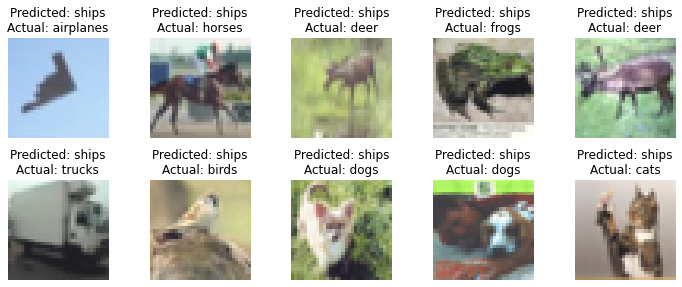

In [ ]:
utils.incorrect_images = identify_incorrectly_labelled_images(model, criterion, device, testloader, 10)
classes = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks"]
denormalize = utils.denormalize
plot_images(incorrect_images, classes)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


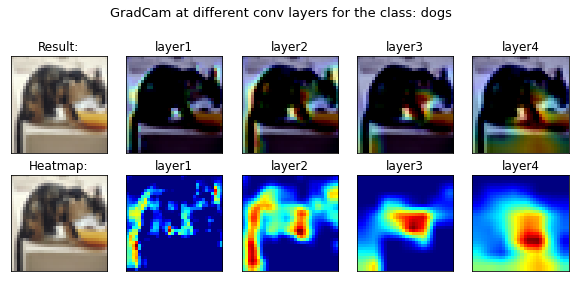

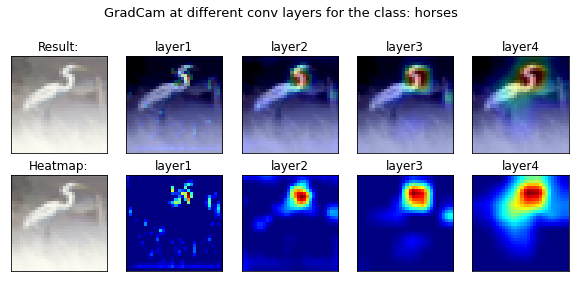

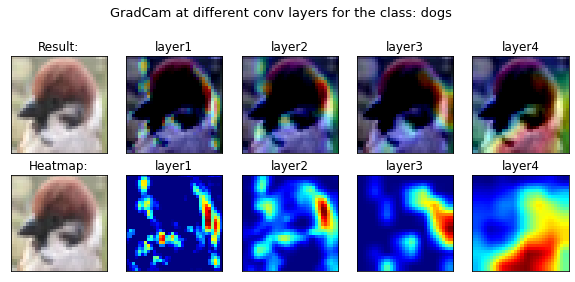

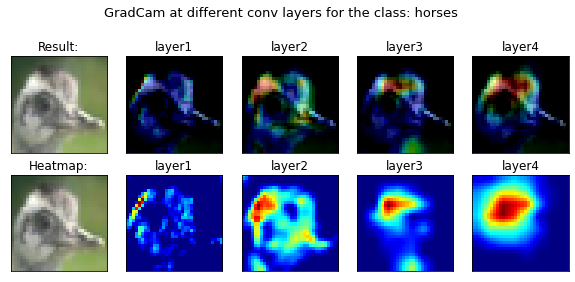

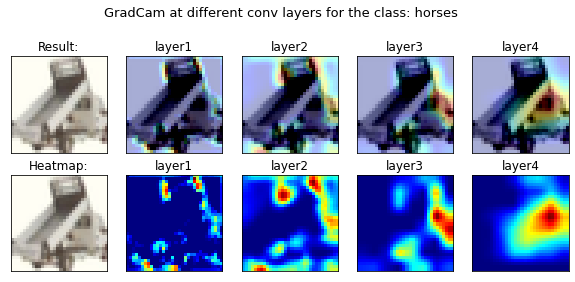

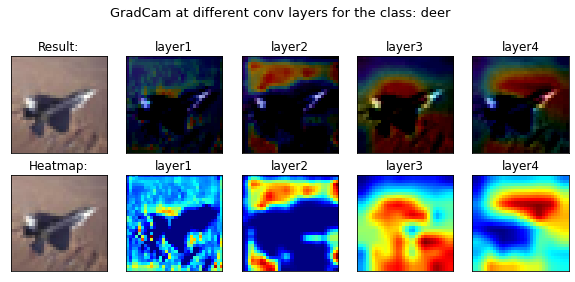

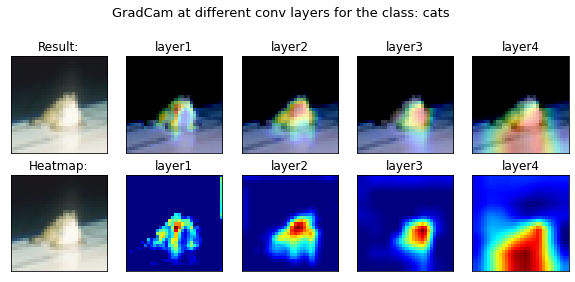

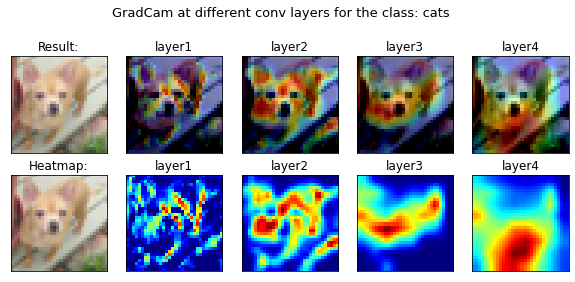

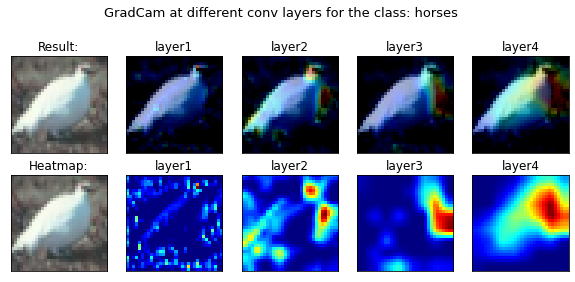

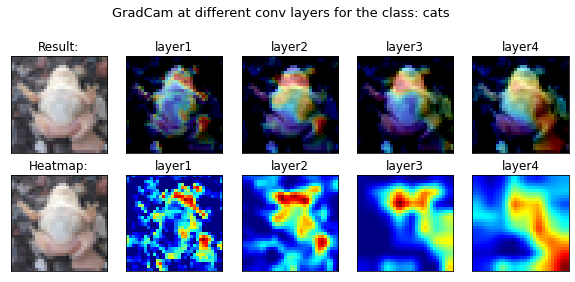

In [ ]:
utils.incorrect_images = identify_incorrectly_labelled_images(model, criterion, device, testloader, 10)
classes = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks"]
denormalize = utils.denormalize
plot_images(incorrect_images, classes)

#graph

In [ ]:
train_losses = getTrainLoss()
test_losses = getTestLoss()
    
fig, axs = plt.subplots(2,1,figsize=(15,10))
axs[0].plot(train_losses, color='b', label='Train Loss')
axs[0].legend(loc="upper right")
axs[0].set_title("Training Loss")

axs[1].plot(test_losses, color='b', label='Test Loss')
axs[1].legend(loc="upper right")
axs[1].set_title("Test Loss")

fig.savefig('train_test_loss.jpg', bbox_inches='tight')